In [4]:
# Rendering a cube with varying focal length / width
# Written by David Fouhey

import matplotlib.pyplot as plt
from itertools import product
import numpy as np

###Helper stuff
def rr():
  #Return a random rotation matrix
  U,_,Vt = np.linalg.svd(np.random.uniform(size=(3,3)))
  #don't change the handedness (e.g., make sure it is not a reflection)
  return U@Vt / np.linalg.det(U) / np.linalg.det(Vt)

def generateCube():
  # return a Nx6 collection of the lines [x1 y1 z1 x2 y2 z2] capturing the
  # corners a unit cube ranging in x,y,z from -0.5 to 0.5
  lines = []
  for x,y,z in product([0,1],[0,1],[0,1]):
    #all corners, check changing all the dimensions
    #if in the cube, keep, but then center at 0
    for dx, dy, dz in [(1,0,0),(-1,0,0),(0,1,0),(0,-1,0),(0,0,1),(0,0,-1)]:
      xp, yp, zp = x+dx, y+dy, z+dz
      if min([xp,yp,zp]) >= 0 and max([xp,yp,zp]) <= 1:
        lines.append((x-0.5,y-0.5,z-0.5,xp-0.5,yp-0.5,zp-0.5))
  return np.vstack(lines)

def xyrange(pL):
  #Given [u1, v1, u2, v2], return the range of u and v
  X, Y = np.vstack([pL[:,0],pL[:,2]]), np.vstack([pL[:,1],pL[:,3]])
  return np.max(X)-np.min(X), np.max(Y) - np.min(Y)
#####


def projectLines(f,R,t,L):
  #Given:
  #  3x3 rotation matrix R
  #  3x1 translation t
  #  scalar focal length f
  #  Nx6 lines L [x1,y1,z1,x2,y2,z2]
  #Return:
  #  Nx4 image projection of lines [u1,v1,u2,v2]
  pL = np.zeros((L.shape[0],4))
  for i in range(L.shape[0]):
    #rotate and translate
    p  = R@L[i,:3]+t
    pp = R@L[i,3:]+t

    #apply projection u = x*f/z; v = y*f/z
    pL[i,:2] = p[0]*f/p[2], p[1]*f/p[2]
    pL[i,2:] = pp[0]*f/pp[2], pp[1]*f/pp[2]
  return np.vstack(pL)

def renderCube(f=1,scaleFToSize=None,t=(0,0,1),R=np.eye(3)):
  #Given:
  #   f -- the focal length
  #   scaleFToSize -- a target size on the retina (sqrt of area)
  #   t -- where the cube is with respect to the camera axes
  #   R -- a rotation
  #Render the cube
  L = generateCube()
  t = np.array(t)
  pL = projectLines(f,R,t,L)

  if scaleFToSize is not None:
    #then adjust f so that the image is the right size
    xRange, yRange = xyrange(pL)
    geoMean = (xRange*yRange)**0.5
    f = (f / geoMean)*scaleFToSize
    #re-render with the right focal length
    pL = projectLines(f,R,t,L)


  plt.figure()
  plt.title("Cube @ [x=%.1f y=%.1f z=%.1f] f=%f" % (t[0],t[1],t[2],f))
  for i in range(pL.shape[0]):
    u1, v1, u2, v2 = pL[i,:]
    plt.plot((u1,u2),(v1,v2),linewidth=2)

  plt.axis('square')
  plt.xlim(-5,5); plt.ylim(-5,5)



In [5]:
L = generateCube()
print(L)

[[-0.5 -0.5 -0.5  0.5 -0.5 -0.5]
 [-0.5 -0.5 -0.5 -0.5  0.5 -0.5]
 [-0.5 -0.5 -0.5 -0.5 -0.5  0.5]
 [-0.5 -0.5  0.5  0.5 -0.5  0.5]
 [-0.5 -0.5  0.5 -0.5  0.5  0.5]
 [-0.5 -0.5  0.5 -0.5 -0.5 -0.5]
 [-0.5  0.5 -0.5  0.5  0.5 -0.5]
 [-0.5  0.5 -0.5 -0.5 -0.5 -0.5]
 [-0.5  0.5 -0.5 -0.5  0.5  0.5]
 [-0.5  0.5  0.5  0.5  0.5  0.5]
 [-0.5  0.5  0.5 -0.5 -0.5  0.5]
 [-0.5  0.5  0.5 -0.5  0.5 -0.5]
 [ 0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
 [ 0.5 -0.5 -0.5  0.5  0.5 -0.5]
 [ 0.5 -0.5 -0.5  0.5 -0.5  0.5]
 [ 0.5 -0.5  0.5 -0.5 -0.5  0.5]
 [ 0.5 -0.5  0.5  0.5  0.5  0.5]
 [ 0.5 -0.5  0.5  0.5 -0.5 -0.5]
 [ 0.5  0.5 -0.5 -0.5  0.5 -0.5]
 [ 0.5  0.5 -0.5  0.5 -0.5 -0.5]
 [ 0.5  0.5 -0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5 -0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5 -0.5  0.5]
 [ 0.5  0.5  0.5  0.5  0.5 -0.5]]


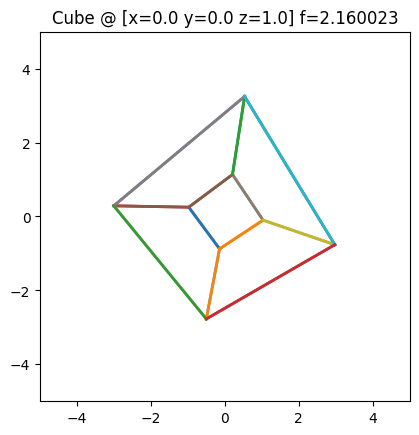

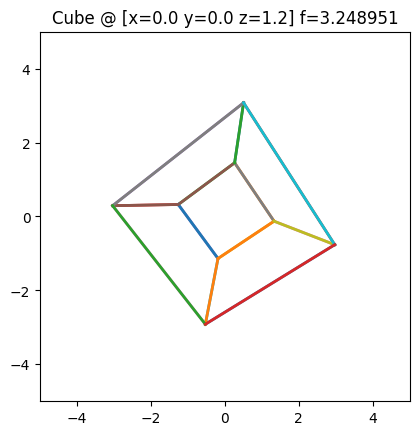

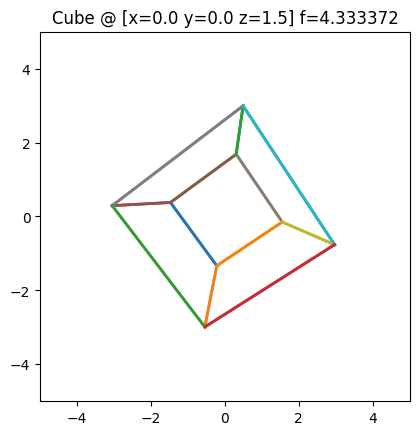

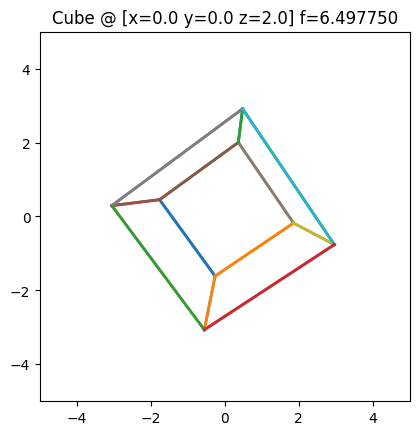

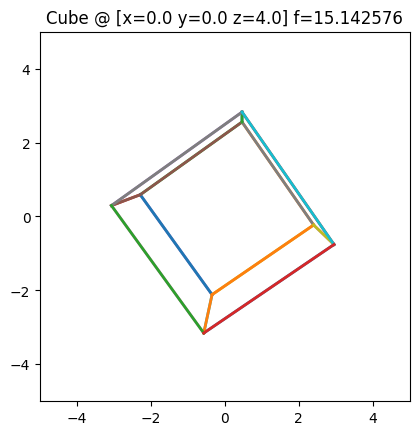

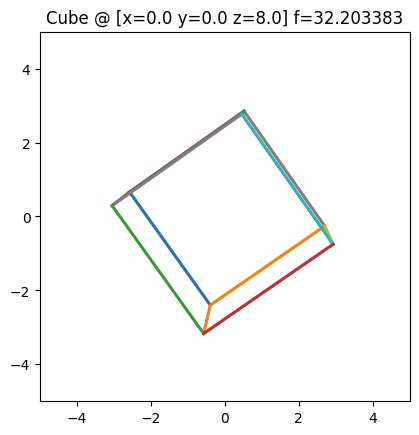

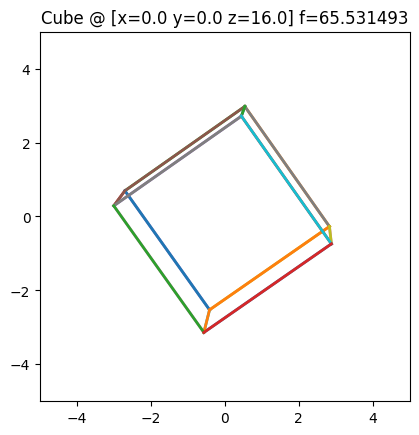

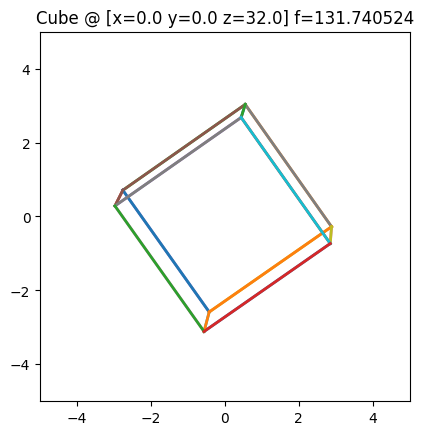

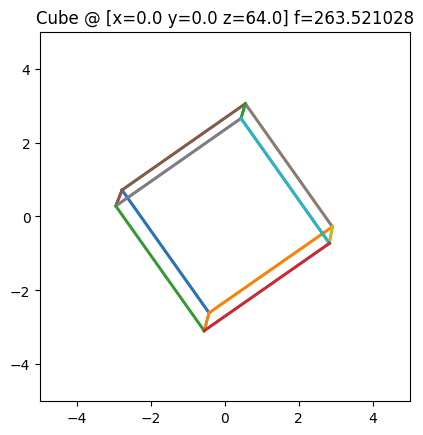

In [6]:

np.random.seed(442442)
R = rr()
#R = np.eye(3) #or this!

#for a series of zs, render things
for z in [1,1.25,1.5,2,4,8,16,32,64]:
  renderCube(scaleFToSize=6,t=(0,0,z),R=R)
#  renderCube(scaleFToSize=None,t=(0,0,z),R=R)